In [1]:
import pandas as pd
# 'Os' is used for data manipulation and analysis
import os
# 'Pandas' is used for data manipulation and analysis
import pandas as pd
# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np
# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns
# suppress display of warnings
from warnings import filterwarnings
filterwarnings('ignore')     
pd.options.display.float_format = '{:.6f}'.format

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize'
plt.rcParams['figure.figsize'] = [15,8]

In [3]:
# "chdir" is used to change the current working directory to specified path
os.chdir(r"C:\Users\91981\Downloads")

In [4]:
# "pd.read_csv" is used to read the csv file format using pandas
hd = pd.read_csv("rides.csv")

In [5]:
# display the top 5 rows of the dataframe
hd.head()

,Drivers Active Per Hour,Riders Active Per Hour,Rides Completed
0,72,295,202.000000
1,50,78,43.000000
2,40,250,181.000000
3,78,140,124.000000
4,74,195,108.000000


In [6]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Drivers Active Per Hour  1099 non-null   int64  
 1   Riders Active Per Hour   1099 non-null   int64  
 2   Rides Completed          1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 25.9 KB


In [7]:
# to check the missing values in the dataset
print(hd.isnull().sum())

Drivers Active Per Hour     0
Riders Active Per Hour      0
Rides Completed            54
dtype: int64


- The data set has 54 missing values in the column rides completed

In [8]:
# There are less number of missing values hence we will drop them
hd = hd.dropna()

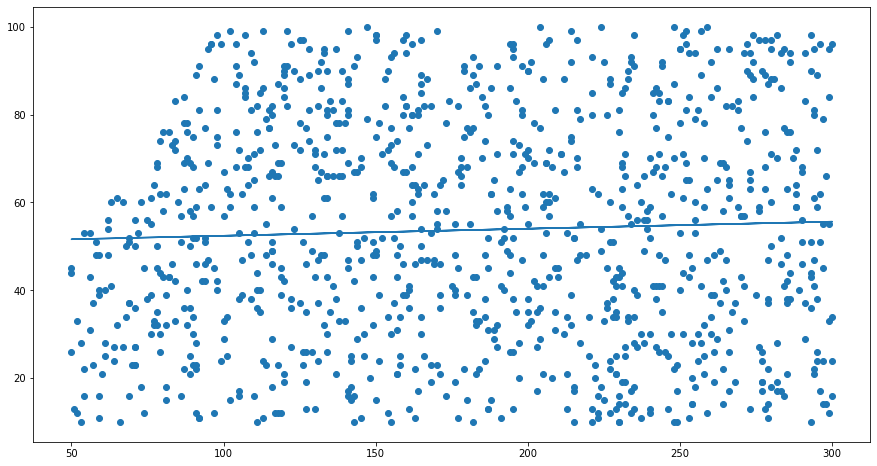

In [9]:
# Analyzing the relationship between the number of drivers active per hour and the number of riders activer per hour
demand = hd["Riders Active Per Hour"]
supply = hd["Drivers Active Per Hour"]

x = demand
y = supply

plt.scatter(x,y, )

z = np.polyfit(x,y,1)
p = np.poly1d(z)

plt.plot(x,p(x))

- This shows there is constant relationship between number of drivers active per hour and the number of riders active per hour
- A constant relationship between the number of drivers active per hour and the number of riders active per hour means that for every X number of drivers, there is a consistent and predictable Y number of riders, and this ratio remains constant over time. 

In [10]:
# Calculate the elasticity of demand for rides concerning the number of active drivers per hour
avg_demand = hd['Riders Active Per Hour'].mean()
avg_supply = hd['Drivers Active Per Hour'].mean()
pct_change_demand = (max(hd['Riders Active Per Hour']) - min(hd['Riders Active Per Hour'])) / avg_demand * 100
pct_change_supply = (max(hd['Drivers Active Per Hour']) - min(hd['Drivers Active Per Hour'])) / avg_supply * 100
elasticity = pct_change_demand / pct_change_supply

print('Elasticity of demand with respect to the number of active drivers per hour: {:.2f}'.format(elasticity))

Elasticity of demand with respect to the number of active drivers per hour: 0.82


- This signifies responsive realtionship between the demand for rides and the number of active drivers per hour. 
- 1% increase in number of active drivers per hour would lead to 0.82% increase in the demand for rides, while a 1% decrease in the number of active drivers per hour would lead to a 0.82% increase in deamands for rides.

In [11]:
# Adding a new column in the dataset by calculating the supply ratio
# Calculate the supply ratio for each level of driver activity
hd['Supply Ratio'] = hd['Rides Completed'] / hd['Drivers Active Per Hour']
print(hd.head())

   Drivers Active Per Hour  Riders Active Per Hour  Rides Completed  \
0                       72                     295       202.000000   
1                       50                      78        43.000000   
2                       40                     250       181.000000   
3                       78                     140       124.000000   
4                       74                     195       108.000000   

   Supply Ratio  
0      2.805556  
1      0.860000  
2      4.525000  
3      1.589744  
4      1.459459  


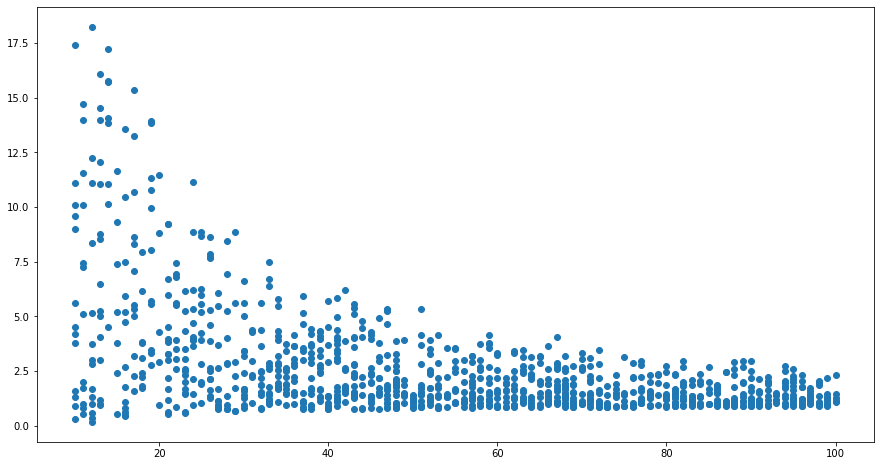

In [12]:
# Visualizing the supply ratio
x = hd["Drivers Active Per Hour"]
y = hd["Supply Ratio"]

plt.scatter(x,y, )



- The above graph shows the ratio of the number of drivers active per hour and the number of rides completed in an hour.